# Lorenzo Cassano 

## Import Libraries

In [16]:
import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
#from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# 1 Load Dataset

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Show the dataset

In [18]:
url = '/content/drive/MyDrive/ML/Data/exam_2021_01_27.csv'
df = pd.read_csv(url, sep = ',',names = ['A','B','C','D','E'])
df.head()

,A,B,C,D,E
0,5.1,3.5,a,NaN,0
1,4.9,3.0,a,NaN,0
2,NaN,3.2,a,NaN,0
3,4.6,NaN,a,0.2,0
4,5.0,3.6,a,0.2,0


## Description of the dataset

In [19]:
df.describe()

,A,B,D,E
count,141.000000,140.000000,137.000000,150.000000
mean,5.897872,3.036429,1.290511,1.000000
std,0.820232,0.437654,0.733934,0.819232
min,4.300000,2.000000,0.100000,0.000000
25%,5.200000,2.800000,0.400000,0.000000
50%,5.800000,3.000000,1.400000,1.000000
75%,6.400000,3.300000,1.800000,2.000000
max,7.900000,4.400000,2.500000,2.000000


In [20]:
print("Number of rows = {}, number of columns = {}".format(df.shape[0], df.shape[1]))

Number of rows = 150, number of columns = 5


# 2 Drop Null row

In [21]:
df1 = df.dropna(axis=0)

In [22]:
df1.head()

,A,B,C,D,E
4,5.0,3.6,a,0.2,0
7,5.0,3.4,a,0.2,0
10,5.4,3.7,a,0.2,0
11,4.8,3.4,a,0.2,0
13,4.3,3.0,a,0.1,0


In [23]:
print("Number of rows = {}, number of columns = {}".format(df1.shape[0], df1.shape[1]))

Number of rows = 122, number of columns = 5


# 3 Converting predicted attributes

In [24]:
def convert(x):
  if x == 'a':
    return 0
  elif x == 'b':
    return 1
  elif x == 'c':
    return 2
  elif x == 'd':
    return 3


df1['C'] = df1['C'].apply(lambda x: convert(x))


In [25]:
print("Values of features ", np.unique(df1['C']))

Values of features  [0 1 2 3]


# 4 Split the dataset in train and test
## Separating attributes from the target

In [26]:
target = 'E'
X = df1.drop(target, axis = 1)
y = df1[target]

In [27]:
ts = 0.3
random_state = 42

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size = ts, random_state = random_state)
print("Training on ", Xtrain.shape[0], " examples")

Training on  85  examples


# 5,6,7,8 Find the best hyperparameters for 2 models and show the accuracy and normalized confusion matrix

## Preparing the enviroment for 2 models 

In [28]:
model_lbls = [
              'dt', 
              'nb', 
            ]

# Set the parameters by cross-validation
tuned_param_dt = [{'max_depth': [*range(1,20)]}]
tuned_param_nb = [{'var_smoothing': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-07, 1e-8, 1e-9, 1e-10]}]                   

models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(), 
           'param': tuned_param_dt,
          },
    'nb': {'name': 'Gaussian Naive Bayes',
           'estimator': GaussianNB(),
           'param': tuned_param_nb
          }

}

scores = ['accuracy']

## Function that shows the result of the best hyperparameter found, the best accuracy and the normalized confusion matrix of a model

In [29]:
# link used: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def print_results(model):
    print("Best parameters set found on train set:")
    print()
    # if best is linear there is no gamma parameter
    print(model.best_params_)
    print()
    print("Best accuracy found = ",round(model.best_score_,2))
    print()
    y_true, y_pred = ytest, model.predict(Xtest)
    print("Confusion matrix:\n")

    title = "Normalized confusion matrix"

    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        Xtest,
        y_true,
        display_labels = ['0','1','2'],
        cmap = plt.cm.Blues,
        normalize = "true",
    )
    
    disp.ax_.set_title(title)

    plt.show()
    print()
  

## Using a loop to find the best hyperameter(s) setting and showing the result with the previous function

Type of classifier:  Decision Tree       
Best parameters set found on train set:

{'max_depth': 4}

Best accuracy found =  0.96

Confusion matrix:



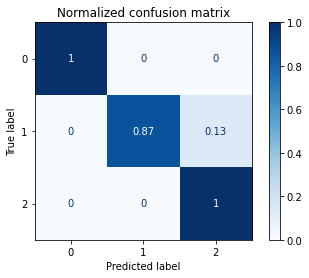


Type of classifier:  Gaussian Naive Bayes
Best parameters set found on train set:

{'var_smoothing': 0.1}

Best accuracy found =  0.96

Confusion matrix:



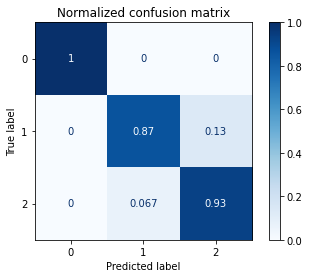

In [30]:
for score in scores:
  for el in model_lbls:
      model = models[el]
      print("Type of classifier: ",model['name'])
      clf = GridSearchCV(estimator = model['estimator'],param_grid = model['param'], scoring = score, 
                          cv = 5, return_train_score = False, n_jobs = 2 ) # this allows using multi-cores
      clf.fit(Xtrain, ytrain)
      print_results(clf)
      